In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample data (replace with your full dataset or CSV file)
data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10],
    'Name': ['John Doe', 'Jane Smith', 'Alice Johnson', 'Bob Brown', 'Emily Davis',
             'Michael Lee', 'Linda Wilson', 'David Clark', 'Susan Lewis', 'James Walker'],
    'Maths': [75, 45, 88, 35, 82, 55, 92, 50, 70, 40],
    'Physics': [68, 52, 90, 40, 79, 58, 95, 48, 72, 38],
    'Chemistry': [80, 60, 85, 38, 88, 60, 93, 45, 68, 35],
    'English': [72, 48, 91, 42, 85, 54, 90, 55, 65, 42],
    'Science': [78, 55, 89, 39, 90, 57, 94, 52, 69, 39],
    'Result': [1, 0, 1, 0, 1, 1, 1, 0, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Features and target
X = df[['Maths', 'Physics', 'Chemistry', 'English', 'Science']]
y = df['Result']

# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Example: Predict pass/fail for a new student
new_student = [[70, 65, 75, 80, 85]]  # marks in 5 subjects
prediction = model.predict(new_student)

print("\nPrediction for new student:", "Pass" if prediction[0] == 1 else "Fail")


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Prediction for new student: Pass


/home/student/Documents/6015/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/student/Documents/6015/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/student/Documents/6015/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [7]:
!pip install scikit-learn


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Sample data - replace this with loading your actual data (e.g., from CSV)
data = {
    'Math': [75, 45, 80, 60, 30],
    'Physics': [68, 50, 90, 55, 40],
    'Chemistry': [72, 40, 85, 65, 35],
    'English': [70, 60, 75, 70, 50],
    'ComputerScience': [80, 55, 95, 60, 45],
    'Result': ['Pass', 'Fail', 'Pass', 'Pass', 'Fail']
}

df = pd.DataFrame(data)

# Features and labels
X = df[['Maths', 'Physics', 'Chemistry', 'English', 'Science']]
y = df['Result']

# Encode target variable ('Pass' -> 1, 'Fail' -> 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Example: Predict if a new student will Pass/Fail
new_student = [[70, 65, 75, 60, 85]]  # Replace with new student scores
prediction = model.predict(new_student)
print("Prediction:", le.inverse_transform(prediction)[0])


KeyError: "['Maths', 'Science'] not in index"

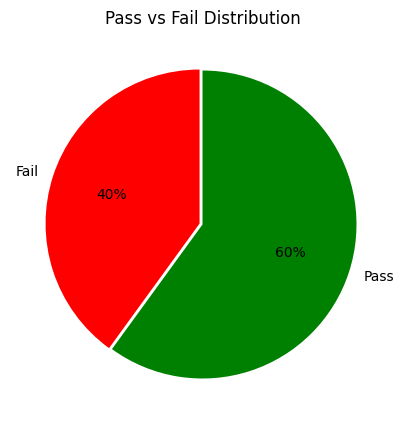

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('student_csv.csv')

# Count pass/fail
result_counts = df['Result'].value_counts().sort_index()  # index 0 = Fail, 1 = Pass

# Labels
labels = ['Fail', 'Pass']

# Colors: red for fail (0), green for pass (1)
colors = ['red', 'green']

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(result_counts, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90, explode=(0.02, 0))
plt.title('Pass vs Fail Distribution')
plt.show()
